# Porównanie wyników pomiarów wydajności QuadTree and KDTree

In [107]:
# Import data libraries, graph and timers
import pandas as pd
import matplotlib.pyplot as plt
from time import process_time
# Imports geometry utilities
from utilities.Point import Point
from utilities.Rectangle import Rectangle
# Imports modules for testing, benchmarking and visualizing
from visualizer.main import Visualizer
from comparator.CaseGenerator import CaseGenerator
from TestManager import TestManager
# Imports data structures (and their visualizers)
from KdTree import KdTree, KdTree_visualizer
from QuadTree import QuadTree, QuadTree_visualizer

## Spis treści:
1. Sprawdzenie poprawności działania porównywanych struktur danych
2. Pomiary wydajności dla różnych rozmiarów danych oraz rodzaju danych wejściowych
3. Generowanie wykresów
4. Pomiary dla indywidulanych przypadków pod zastosowania drzewa

## 1. Sprawdzenie poprawności działania porównywanych struktur danych

KdTree:

In [108]:
KdTree_tests = TestManager(KdTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all tests.


QuadTree:

In [109]:
QuadTree_tests = TestManager(QuadTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all tests.


Weryfikacja:

In [110]:
assert KdTree_tests and QuadTree_tests
print("All tests passed!")

All tests passed!


## 2. Pomiary wydajności

In [111]:
cg = CaseGenerator()
q_int = [1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500]
q_2int = [(val//2, val//2) for val in q_int]
q_grid = [(100, val//100) for val in q_int]
q_clust = [val//3 for val in q_int]

def benchmark(func, quantities, destination=Rectangle(Point([0,0]), Point([100,100])), cluster=None, title="Benchmark"):
    global q_int
    data = []
    data2 = []
    for q in quantities:
        if cluster is not None:
            points = func(q, cluster)
        else:
            points = func(q, destination)
        t1 = process_time()
        kd = KdTree(points)
        t2 = process_time()
        quad = QuadTree(points)
        t3 = process_time()
        kd.search_in_rectangle(destination)
        t4 = process_time()
        quad.search_in_rectangle(destination)
        t5 = process_time()
        data.append((t2-t1, t3-t2))
        data2.append((t4-t3, t5-t4))
    qua = ["Liczba punktów"]    
    col = ["KdTree", "QuadTree"]
    top = ["", "Czas konstrukcji [s]", "Czas przeszukiwania [s]"]
    idx = list(range(1, len(quantities) + 1))
    df = pd.concat([pd.concat([pd.DataFrame(q_int, columns=qua, index=idx), 
                    pd.DataFrame(data, columns=col, index=idx), 
                    pd.DataFrame(data2, columns=col, index=idx)], axis=1, keys=top)], axis=1, keys=[title])
    return df


2.1 Rozkład jednorodny

In [112]:
df1 = benchmark(cg.uniform_distribution, q_int, title="Rozkład jednorodny")
df1

Rozkład jednorodny                                                         \
                      Czas konstrukcji [s]           Czas przeszukiwania [s]   
       Liczba punktów               KdTree  QuadTree                  KdTree   
1                1000             0.015625  0.062500                0.000000   
2                2500             0.062500  0.171875                0.000000   
3                5000             0.093750  0.421875                0.000000   
4                7500             0.531250  0.687500                0.000000   
5               10000             0.390625  0.828125                0.015625   
6               12500             0.687500  0.968750                0.015625   
7               15000             0.968750  1.109375                0.015625   
8               17500             0.984375  1.296875                0.015625   
9               20000             1.531250  1.921875                0.015625   
10              22500             1.328125  2.171875                0.015625   

              
              
    QuadTree  
1   0.031250  
2   0.078125  
3   0.140625  
4   0.203125  
5   0.296875  
6   0.390625  
7   0.437500  
8   0.515625  
9   0.656250  
10  0.656250

2.2 Rozkład normalny

In [113]:
df2 = benchmark(cg.normal_distribution, q_int, title="Rozkład normalny")
df2

Rozkład normalny                                                         \
                    Czas konstrukcji [s]           Czas przeszukiwania [s]   
     Liczba punktów               KdTree  QuadTree                  KdTree   
1              1000             0.015625  0.062500                0.000000   
2              2500             0.046875  0.125000                0.015625   
3              5000             0.203125  0.437500                0.000000   
4              7500             0.375000  0.625000                0.015625   
5             10000             0.421875  0.765625                0.015625   
6             12500             0.468750  0.968750                0.000000   
7             15000             0.828125  1.234375                0.015625   
8             17500             0.703125  1.687500                0.031250   
9             20000             0.875000  1.953125                0.031250   
10            22500             0.859375  2.281250                0.031250   

              
              
    QuadTree  
1   0.015625  
2   0.078125  
3   0.187500  
4   0.234375  
5   0.281250  
6   0.359375  
7   0.421875  
8   0.500000  
9   0.562500  
10  0.671875

2.3 Rozkład "posadzka"

In [114]:
df3 = benchmark(cg.grid_distribution, q_grid, title="Rozkład siatka")
df3

Rozkład siatka                                                         \
                  Czas konstrukcji [s]           Czas przeszukiwania [s]   
   Liczba punktów               KdTree  QuadTree                  KdTree   
1            1000             0.046875  0.078125                0.000000   
2            2500             0.046875  0.234375                0.000000   
3            5000             0.203125  0.375000                0.000000   
4            7500             0.281250  0.500000                0.000000   
5           10000             0.359375  0.609375                0.015625   
6           12500             0.453125  0.828125                0.031250   
7           15000             0.515625  1.218750                0.015625   
8           17500             0.640625  1.437500                0.015625   
9           20000             0.703125  1.859375                0.015625   
10          22500             0.875000  2.015625                0.015625   

              
              
    QuadTree  
1   0.031250  
2   0.078125  
3   0.125000  
4   0.203125  
5   0.203125  
6   0.218750  
7   0.328125  
8   0.406250  
9   0.515625  
10  0.687500

2.4 Rozkład klastrowy

In [115]:
c = (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30])))
df4 = benchmark(cg.cluster_distribution, q_clust, cluster=c, title="Rozkład klastrowy")
df4

Rozkład klastrowy                                                         \
                     Czas konstrukcji [s]           Czas przeszukiwania [s]   
      Liczba punktów               KdTree  QuadTree                  KdTree   
1               1000             0.031250  0.062500                0.000000   
2               2500             0.031250  0.140625                0.000000   
3               5000             0.093750  0.421875                0.000000   
4               7500             0.296875  0.796875                0.015625   
5              10000             0.406250  0.843750                0.015625   
6              12500             0.703125  1.109375                0.015625   
7              15000             0.656250  1.578125                0.000000   
8              17500             1.203125  1.515625                0.015625   
9              20000             1.265625  2.156250                0.015625   
10             22500             0.875000  2.343750                0.015625   

              
              
    QuadTree  
1   0.031250  
2   0.093750  
3   0.156250  
4   0.234375  
5   0.281250  
6   0.484375  
7   0.515625  
8   0.625000  
9   0.656250  
10  0.656250

2.5 Rozkład krzyżowy

In [116]:
df5 = benchmark(cg.cross_distribution, q_2int, title="Rozkład krzyż")
df5

Rozkład krzyż                                                         \
                  Czas konstrukcji [s]           Czas przeszukiwania [s]   
   Liczba punktów               KdTree  QuadTree                  KdTree   
1            1000             0.031250  0.093750                0.000000   
2            2500             0.046875  0.250000                0.000000   
3            5000             0.125000  0.859375                0.000000   
4            7500             0.343750  1.234375                0.000000   
5           10000             0.421875  1.718750                0.000000   
6           12500             0.546875  2.000000                0.015625   
7           15000             0.656250  2.468750                0.000000   
8           17500             0.781250  2.812500                0.015625   
9           20000             1.250000  4.515625                0.015625   
10          22500             0.671875  4.734375                0.046875   

              
              
    QuadTree  
1   0.046875  
2   0.156250  
3   0.296875  
4   0.421875  
5   0.578125  
6   0.671875  
7   0.875000  
8   1.031250  
9   1.234375  
10  1.281250

2.6 Rozkład prostokątny

In [117]:
df6 = benchmark(cg.rectangle_distribution, q_int, title="Rozkład prostokąt")
df6

Rozkład prostokąt                                                         \
                     Czas konstrukcji [s]           Czas przeszukiwania [s]   
      Liczba punktów               KdTree  QuadTree                  KdTree   
1               1000             0.046875  0.109375                0.000000   
2               2500             0.046875  0.218750                0.000000   
3               5000             0.125000  0.968750                0.000000   
4               7500             0.328125  1.171875                0.015625   
5              10000             0.437500  1.531250                0.000000   
6              12500             0.234375  3.046875                0.015625   
7              15000             0.765625  2.859375                0.015625   
8              17500             0.781250  2.796875                0.000000   
9              20000             1.187500  2.906250                0.000000   
10             22500             1.015625  4.000000                0.015625   

              
              
    QuadTree  
1   0.046875  
2   0.156250  
3   0.281250  
4   0.421875  
5   0.625000  
6   0.828125  
7   0.828125  
8   1.000000  
9   1.093750  
10  1.265625

## 3. Generowanie wykresów

In [118]:
def show_graphs(df, title):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle(title)
    ax1.title.set_text("Czas konstrukcji")
    ax1.plot(df[title][""]["Liczba punktów"], df[title, "Czas konstrukcji [s]"]["KdTree"], label="KdTree", marker="o")
    ax1.plot(df[title][""]["Liczba punktów"], df[title, "Czas konstrukcji [s]"]["QuadTree"], label="QuadTree", marker="o")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.set_xlabel("Liczba punktów")
    ax1.legend()
    ax2.title.set_text("Czas przeszukiwania")
    ax2.plot(df[title][""]["Liczba punktów"], df[title, "Czas przeszukiwania [s]"]["KdTree"], label="KdTree", marker="o")
    ax2.plot(df[title][""]["Liczba punktów"], df[title, "Czas przeszukiwania [s]"]["QuadTree"], label="QuadTree", marker="o")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.set_xlabel("Liczba punktów")
    ax2.legend()
    plt.show()    

3.1 Rozkład równomierny

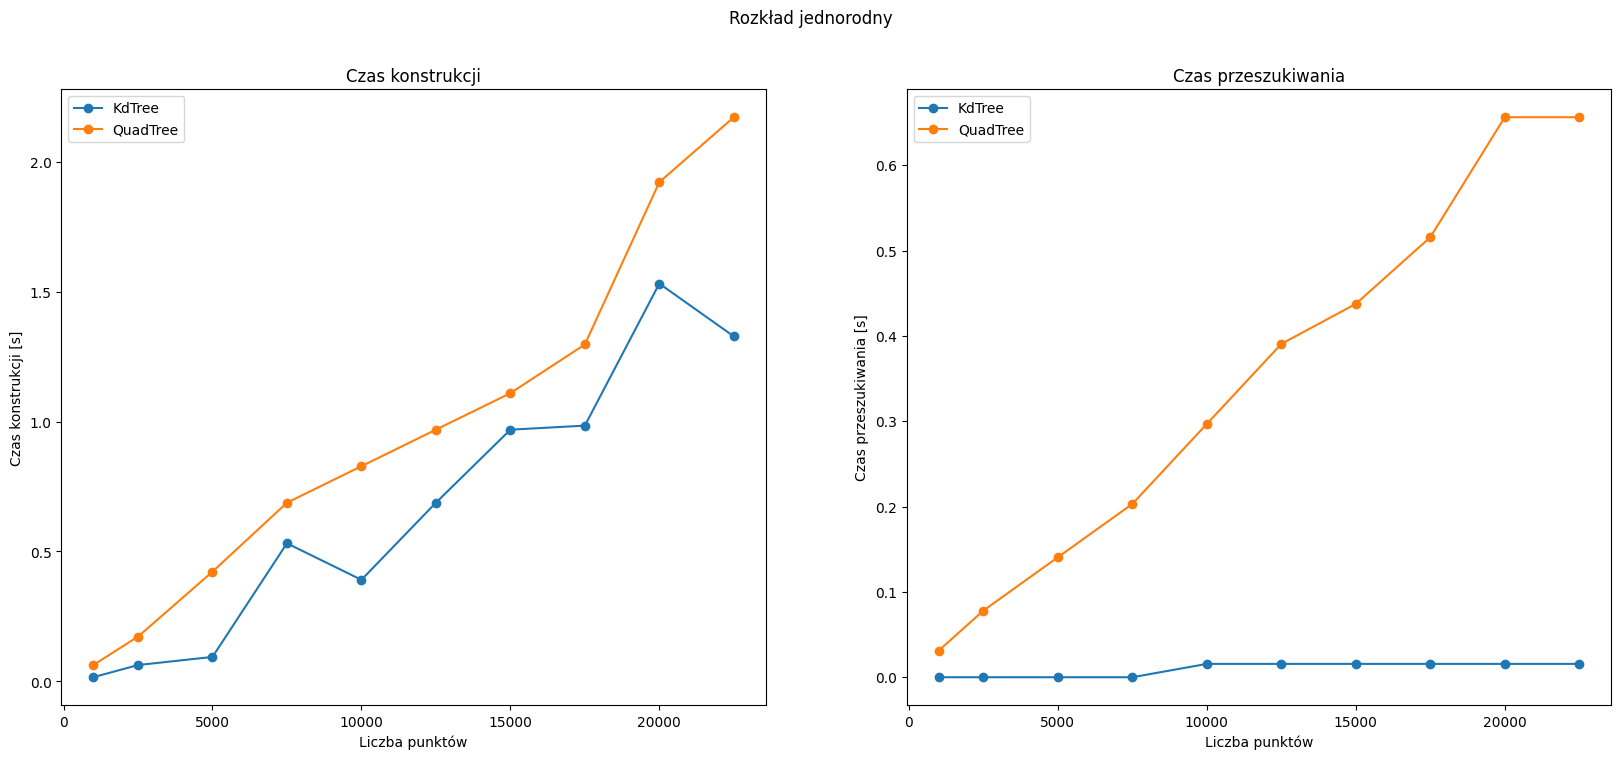

In [119]:
show_graphs(df1, "Rozkład jednorodny")

3.2 Rozkład normalny

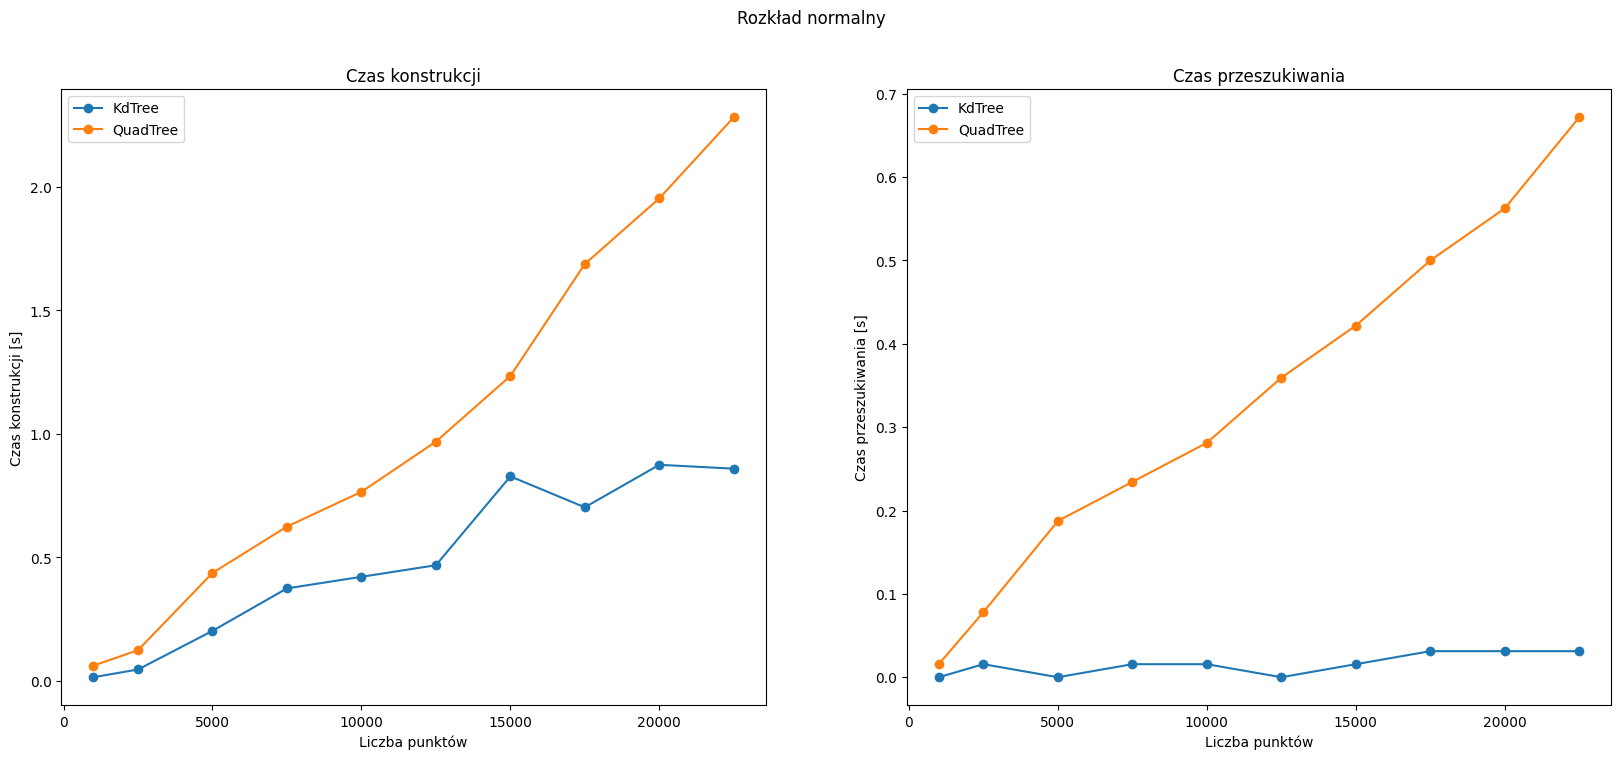

In [120]:
show_graphs(df2, "Rozkład normalny")

3.3 Rozkład "posadzka"

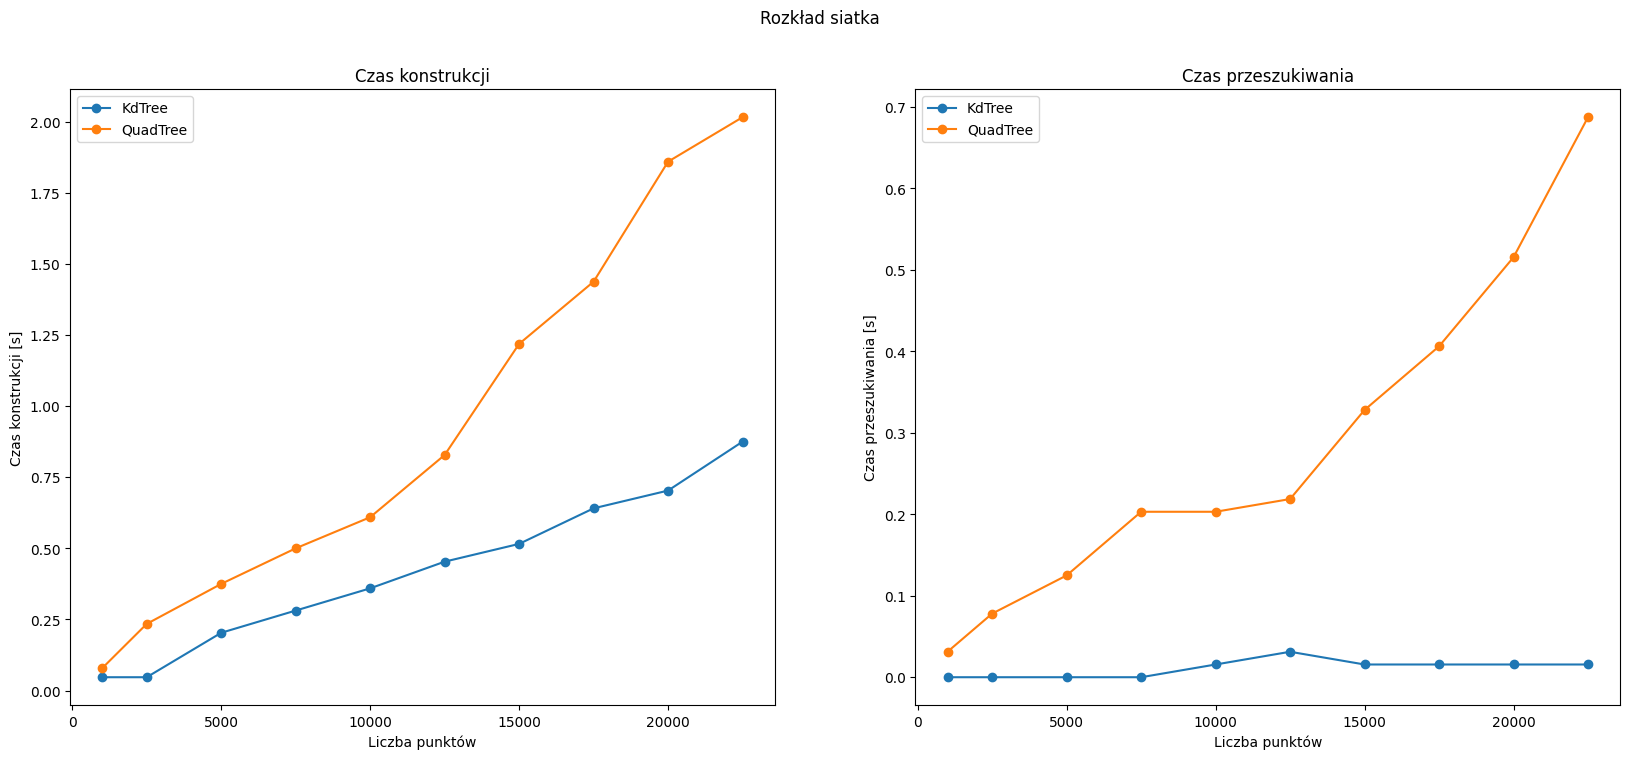

In [121]:
show_graphs(df3, "Rozkład siatka")

3.4 Rozkład klastrowy

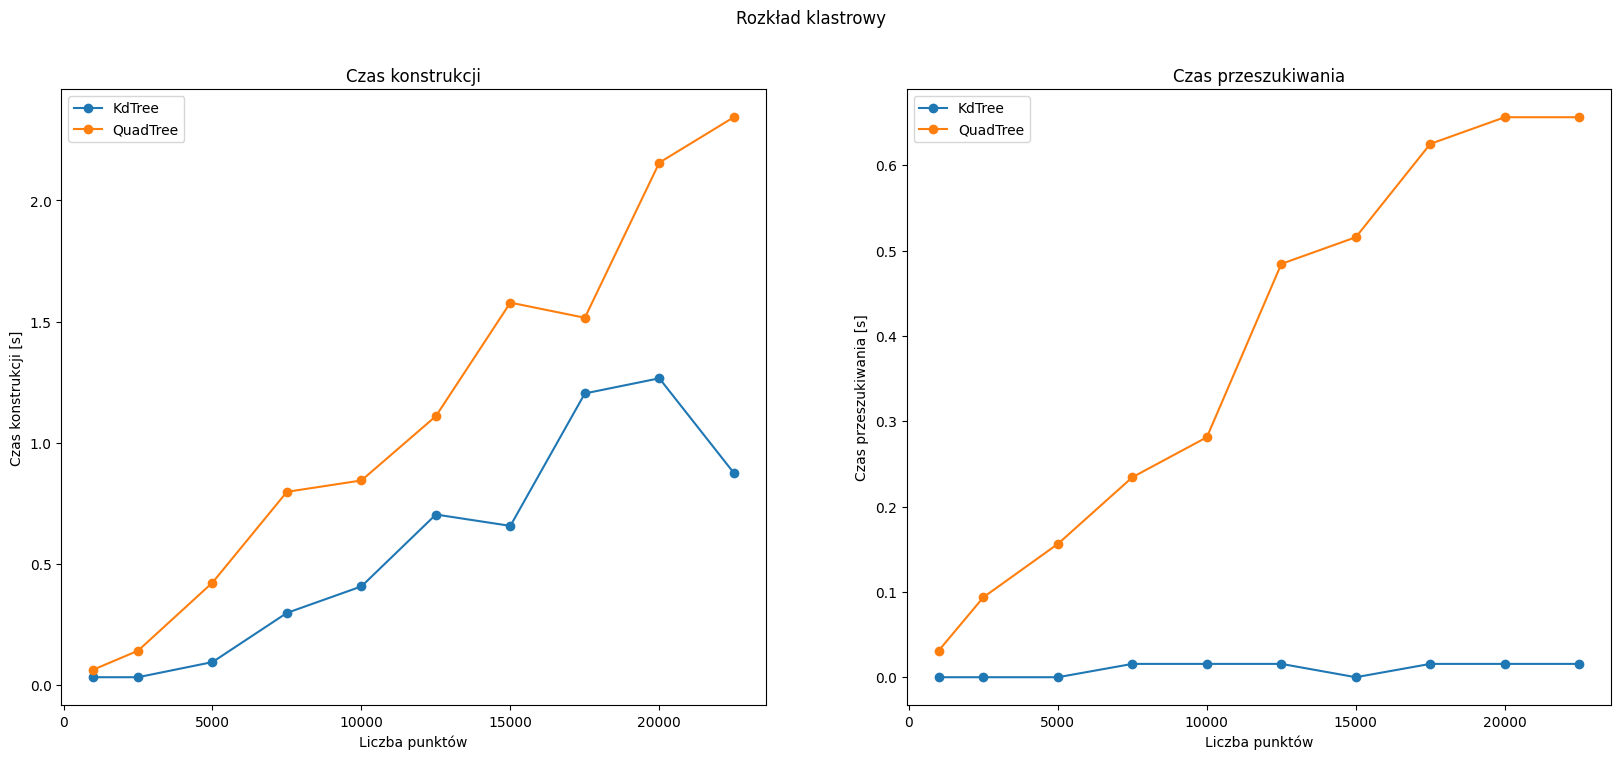

In [122]:
show_graphs(df4, "Rozkład klastrowy")

3.5 Rozkład krzyżowy

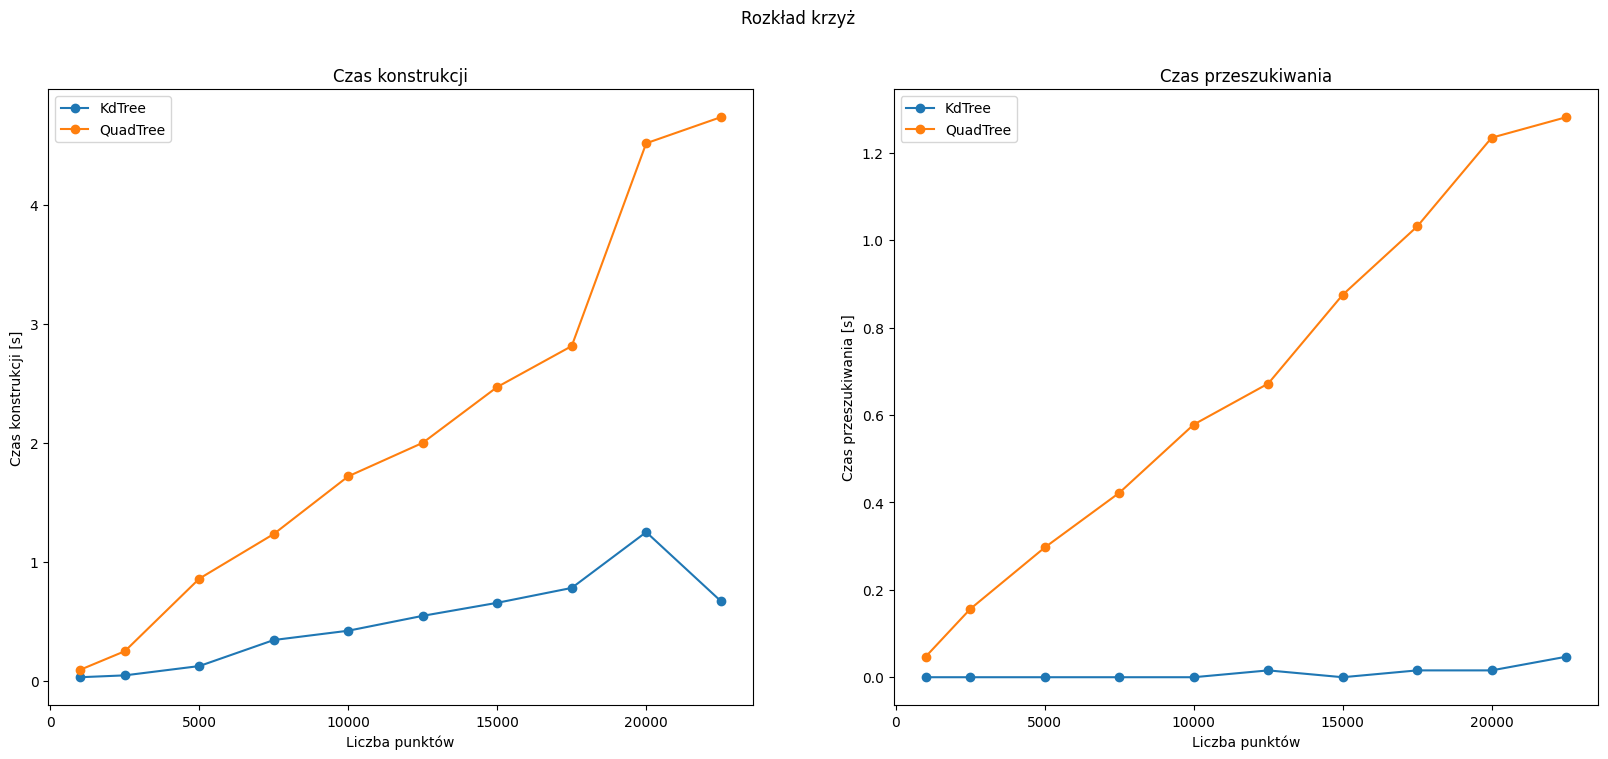

In [123]:
show_graphs(df5, "Rozkład krzyż")

3.6 Rozkład prostokątny

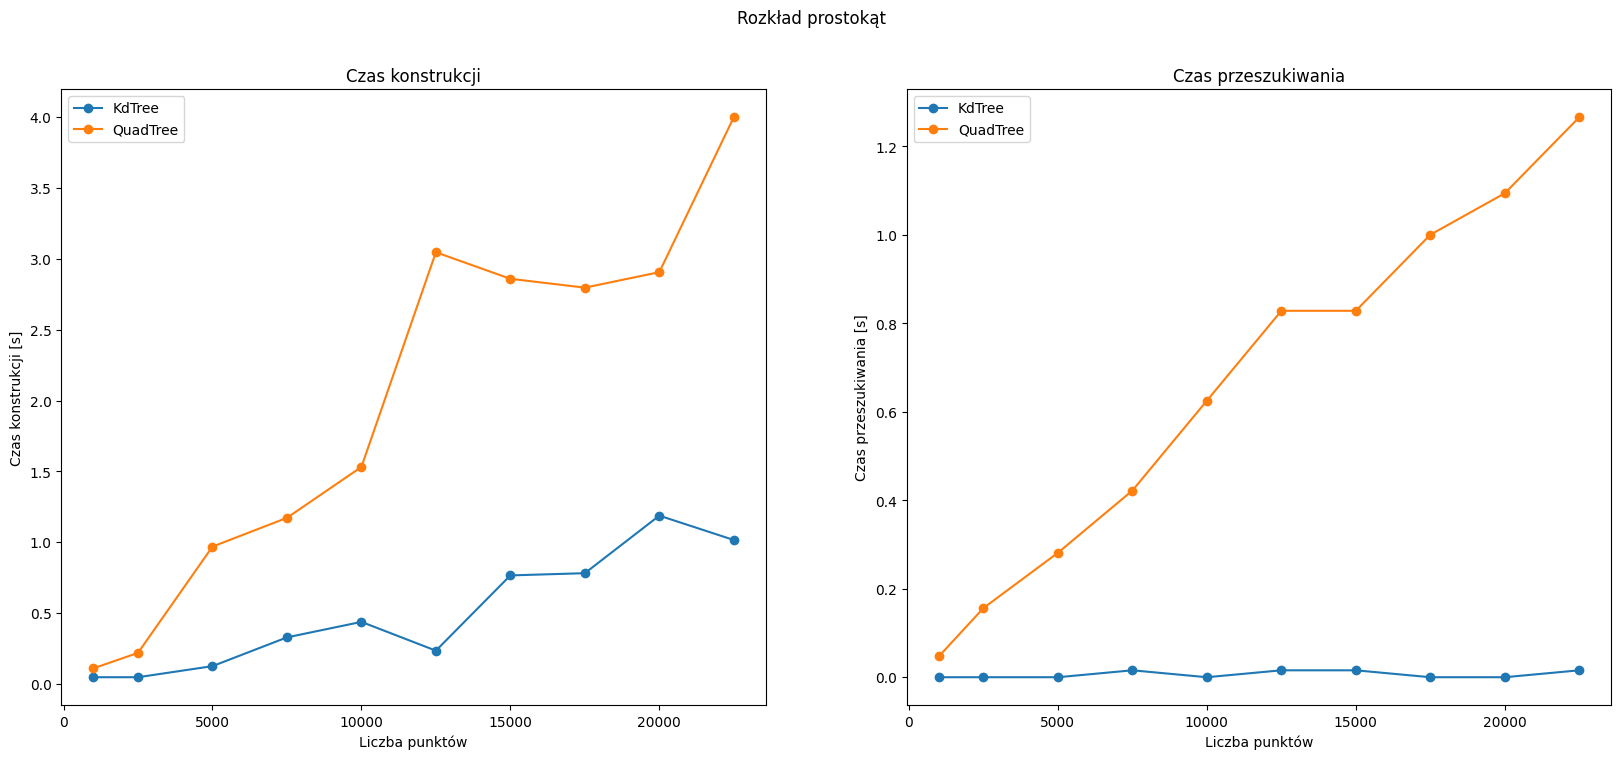

In [124]:
show_graphs(df6, "Rozkład prostokąt")

## 4. Pomiary dla indywidulanych przypadków pod zastosowania drzewa

4.1 Wydajność dla KDTree w zależności od ilości wymiarów

4.2 Wydajność dla QuadTree w zależności od wartości parametru `max_capacity`

------------------------------------------------------------------------------------------------------------------------------------------------